In [41]:
import os
import open3d as o3d
from utils.imageProcessing import *
from utils.dicomFiles import *
from utils.plotting import *

In [42]:
# load the DICOM files
dcm_path = './dicom-files/arq3/pt2'

files = []

for f in os.listdir(dcm_path):
    filename = os.path.join(dcm_path, f)
    if filename[-3:] == 'dcm':
        files.append(pydicom.dcmread(filename))

# skip files with no SliceLocation (eg scout views)

slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

slices = list(map(getImgFromDicom, sorted(slices, key=lambda s: s.SliceLocation)))

/home/rafael/.asdf/installs/python/3.6.14/lib/python3.6/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:239: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (11-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({bits_stored}-bit) "


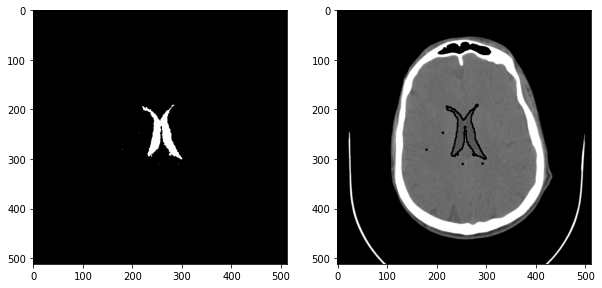

In [43]:
original = slices[85]
mask = identifyVentricle(original)
contour_image = drawContour(original.copy(), mask)
compareTwoImages(mask, contour_image)

In [48]:
vertex = []
for Z in range(len(slices)):
    mask = identifyVentricle(slices[Z])
    edges =  cv2.Canny(mask, 85, 200)
    points = edges
    for X in range(len(points)):
        for Y in range(len(points[X])):
                if points[X][Y] == 255:
                    vertex.append((X,Y,5*Z))
vertex = np.array(vertex, dtype=np.float64)
x = vertex[:, 0]
y = vertex[:, 1]
z = vertex[:, 2]
len(z)

81031

In [47]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(vertex)
o3d.visualization.draw_geometries([pcd])
